In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv


# EDA and Data cleaning

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv(r'/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv')
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [4]:
# Rename the columns for better understanding
data.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  383 non-null    int64 
 1   Gender                               383 non-null    object
 2   Smoking                              383 non-null    object
 3   Smoking History                      383 non-null    object
 4   Radiotherapy History                 383 non-null    object
 5   Thyroid Function                     383 non-null    object
 6   Physical Examination                 383 non-null    object
 7   Adenopathy                           383 non-null    object
 8   Types of Thyroid Cancer (Pathology)  383 non-null    object
 9   Focality                             383 non-null    object
 10  Risk                                 383 non-null    object
 11  Tumor                                383 non-

In [6]:
#Replace The values with a more understandable values
data['Adenopathy'].replace({'No' : 'No Lympth Adenopathy' ,
                          'Left' : 'Left Side Body Adenopathy' ,
                          'Right' : 'Right Side Body Adenopathy' ,
                          'Extensive' : 'Extensive and Widespread'}, inplace = True)

data['Stage'].replace({'I' : 'First-Stage' , 'II' : 'Second-Stage' , 'III' : 'Third-Stage'} ,inplace = True)

data['Tumor'].replace({'T1a' : 'tumor that is 1 cm or smaller' , 'T1b' : 'tumor larger than 1 cm but not larger than 2 cm' ,
                     'T2' : 'tumor larger than 2 cm but not larger than 4 cm' , 
                     'T3a' : 'tumor larger than 4 cm' ,'T3b' : 'tumor that has grown outside the thyroid' ,
                     'T4a' : 'tumor that has invaded nearby structures' ,
                     'T4b' : 'tumor that has invaded nearby structures'} , inplace =True)

data['Lymph Nodes'].replace({'N0' : 'no evidence of regional lymph node metastasis' ,
                     'N1b' : 'regional lymph node metastasis in the central  of the neck' ,
                     'N1a' : 'regional lymph node metastasis in the lateral of the neck'} , inplace =True)

data['Cancer Metastasis'].replace({'M0': 'no evidence of distant metastasis' , 'M1' : 'the presence of distant metastasis'} ,inplace =True )

/tmp/ipykernel_18/656468923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Adenopathy'].replace({'No' : 'No Lympth Adenopathy' ,
/tmp/ipykernel_18/656468923.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

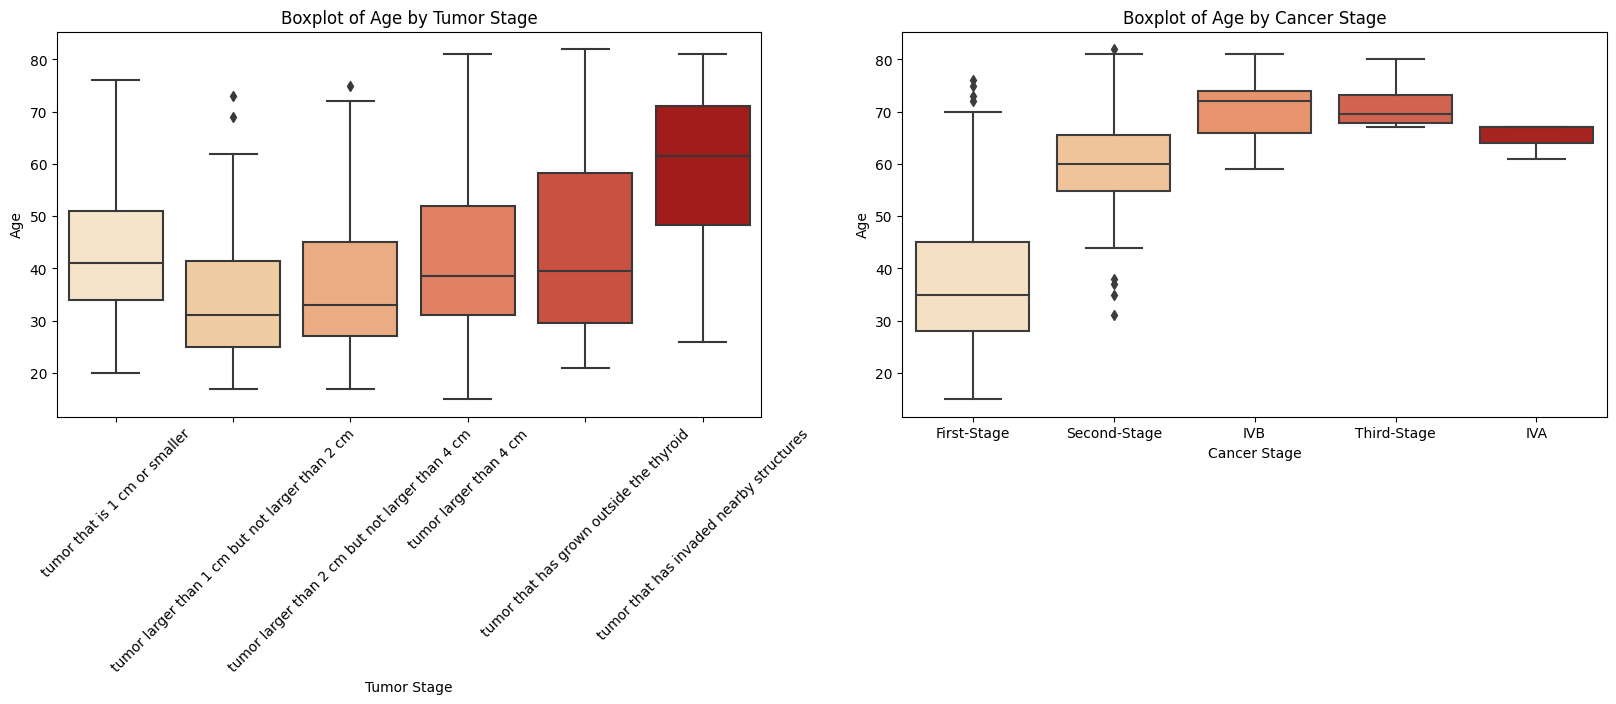

In [7]:
# Create a box plot to show the outliers and explore the data

import matplotlib.pyplot as plt
import seaborn as sns
# Create a 1x2 grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Boxplot for Tumor
sns.boxplot(x='Tumor', y='Age', data=data, palette="OrRd", ax=axes[0])
axes[0].set_title('Boxplot of Age by Tumor Stage') 
axes[0].set_xlabel('Tumor Stage')
axes[0].set_ylabel('Age')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for Stage
sns.boxplot(x='Stage', y='Age', data=data,palette="OrRd", ax=axes[1])
axes[1].set_title('Boxplot of Age by Cancer Stage')
axes[1].set_xlabel('Cancer Stage')
axes[1].set_ylabel('Age')
axes[1].tick_params(axis='x', rotation=0)

plt.show()

In [8]:
def map_risk_to_percentage(risk):
    if risk == 'Low':
        return 1
    elif risk == 'Intermediate':
        return 2
    else:
        return 3

# Apply the function to create the new column
data['Risk Rate (Out of 3)'] = data['Risk'].apply(map_risk_to_percentage)

In [9]:
#Pivot Table to show the Risk of each patient based on the patient age and the stage of thyroid cancer
pd.set_option('display.max_columns', None)
pivot_table = pd.pivot_table(data, values='Risk Rate (Out of 3)', index=['Stage', 'Smoking'], columns='Age', fill_value=None).round(1)
pivot_table

Age                    15   17   18   19   20   21   22   23   24   25   26  \
Stage        Smoking                                                          
First-Stage  No       2.0  2.0  2.0  1.0  1.5  1.2  1.2  1.2  1.1  1.1  1.3   
             Yes      NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  3.0   
IVA          Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Second-Stage No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Third-Stage  No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Age                    27   28   29   30   31   32   33   34   35   36   37  \
Stage        Smoking                                                          
First-Stage  No       1.2  1.1  1.2  1.2  1.4  1.4  1.2  1.6  1.4  1.3  1.2   
             Yes      NaN  1.0  1.0  NaN  1.2  NaN  NaN  NaN  NaN  NaN  NaN   
IVA          Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Second-Stage No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0   
             Yes      NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  3.0  NaN  NaN   
Third-Stage  No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Age                    38   39   40   41   42   43   44   45   46   47   48  \
Stage        Smoking                                                          
First-Stage  No       1.1  1.0  1.3  1.0  1.2  1.0  1.3  1.1  1.2  1.5  1.8   
             Yes      2.0  NaN  2.0  2.0  NaN  NaN  1.0  NaN  NaN  NaN  NaN   
IVA          Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Second-Stage No       3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  3.0  NaN  NaN   
Third-Stage  No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Age                    49   50   51   52   53   54   55   56   57   58   59  \
Stage        Smoking                                                          
First-Stage  No       1.8  1.2  1.2  1.0  2.3  1.0  1.0  1.0  1.0  NaN  1.0   
             Yes      NaN  NaN  NaN  1.2  NaN  NaN  NaN  2.0  1.0  NaN  2.0   
IVA          Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Second-Stage No       NaN  NaN  3.0  NaN  NaN  NaN  2.0  2.5  NaN  2.0  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  NaN   
Third-Stage  No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Age                    60   61   62   63   64   65   66   67   68   69   70  \
Stage        Smoking                                                          
First-Stage  No       1.2  1.0  1.2  1.0  NaN  NaN  1.0  1.0  1.0  1.0  1.0   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN   
IVA          Yes      NaN  3.0  NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  3.0  NaN  NaN   
             Yes      NaN  NaN  3.0  NaN  NaN 

**From the above pivot table, we can conclude that the higher the stage of thyroid cancer, the greater the risk for the patient. Additionally, in some cases, smoking may adversely affect the patient's risk.**

# Data Visualisation

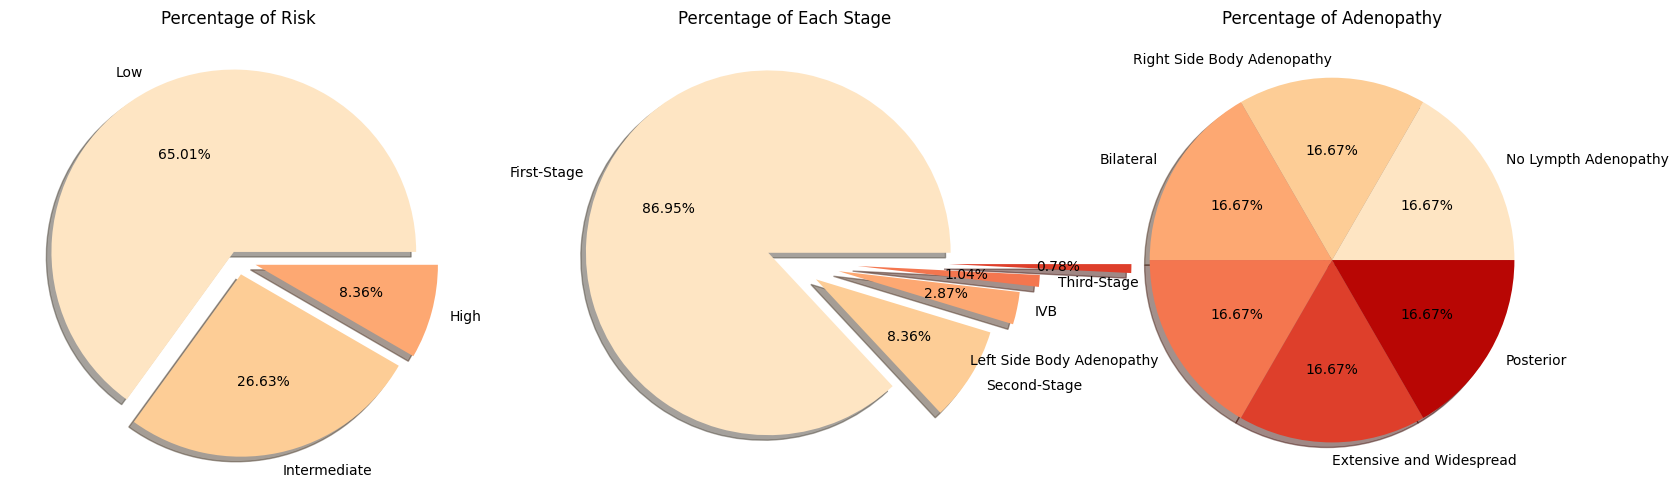

In [10]:
sns.set_palette("OrRd")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Pie chart for 'Risk'
risky = data['Risk'].value_counts()
risky.plot(kind='pie', autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=risky.index, shadow=True, ax=axes[0])
axes[0].set_title('Percentage of Risk')
axes[0].set_ylabel('')

# Pie chart for 'Stage'
Stage_of_Cancer = data['Stage'].value_counts()
Stage_of_Cancer.plot(kind='pie', autopct='%0.2f%%', labels=Stage_of_Cancer.index, explode=[0.1, 0.2, 0.3, 0.4, 0.9], shadow=True, ax=axes[1])
axes[1].set_title('Percentage of Each Stage')
axes[1].set_ylabel('')

# Pie chart for 'Adenopathy'
aden = data['Adenopathy'].value_counts()
aden.value_counts().plot(kind='pie', autopct='%0.2f%%', labels=aden.index, shadow=True, ax=axes[2])
axes[2].set_title('Percentage of Adenopathy')
axes[2].set_ylabel('')


plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


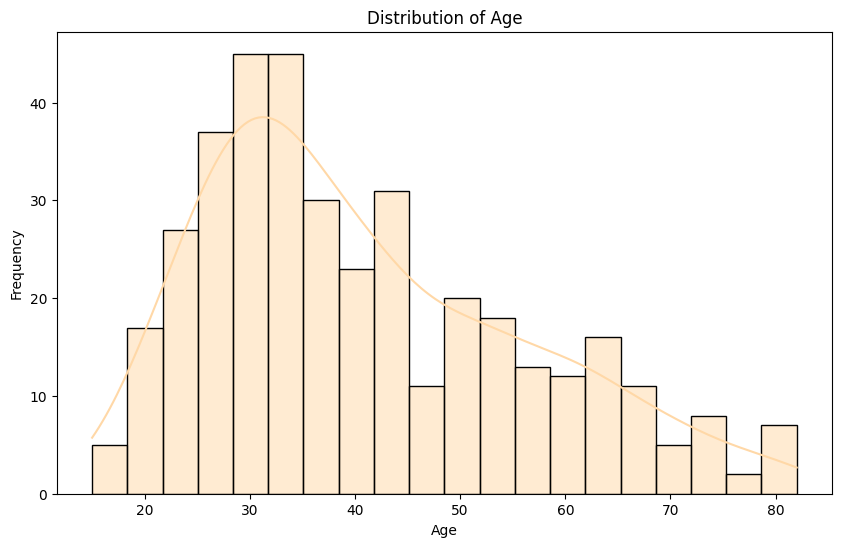

In [11]:
# Visualize the distribution of ages using a histogram.
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='#ffd8a7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

**Insight: From the above plot we can conclude that the majority of patients have a 40 and 41 years old**

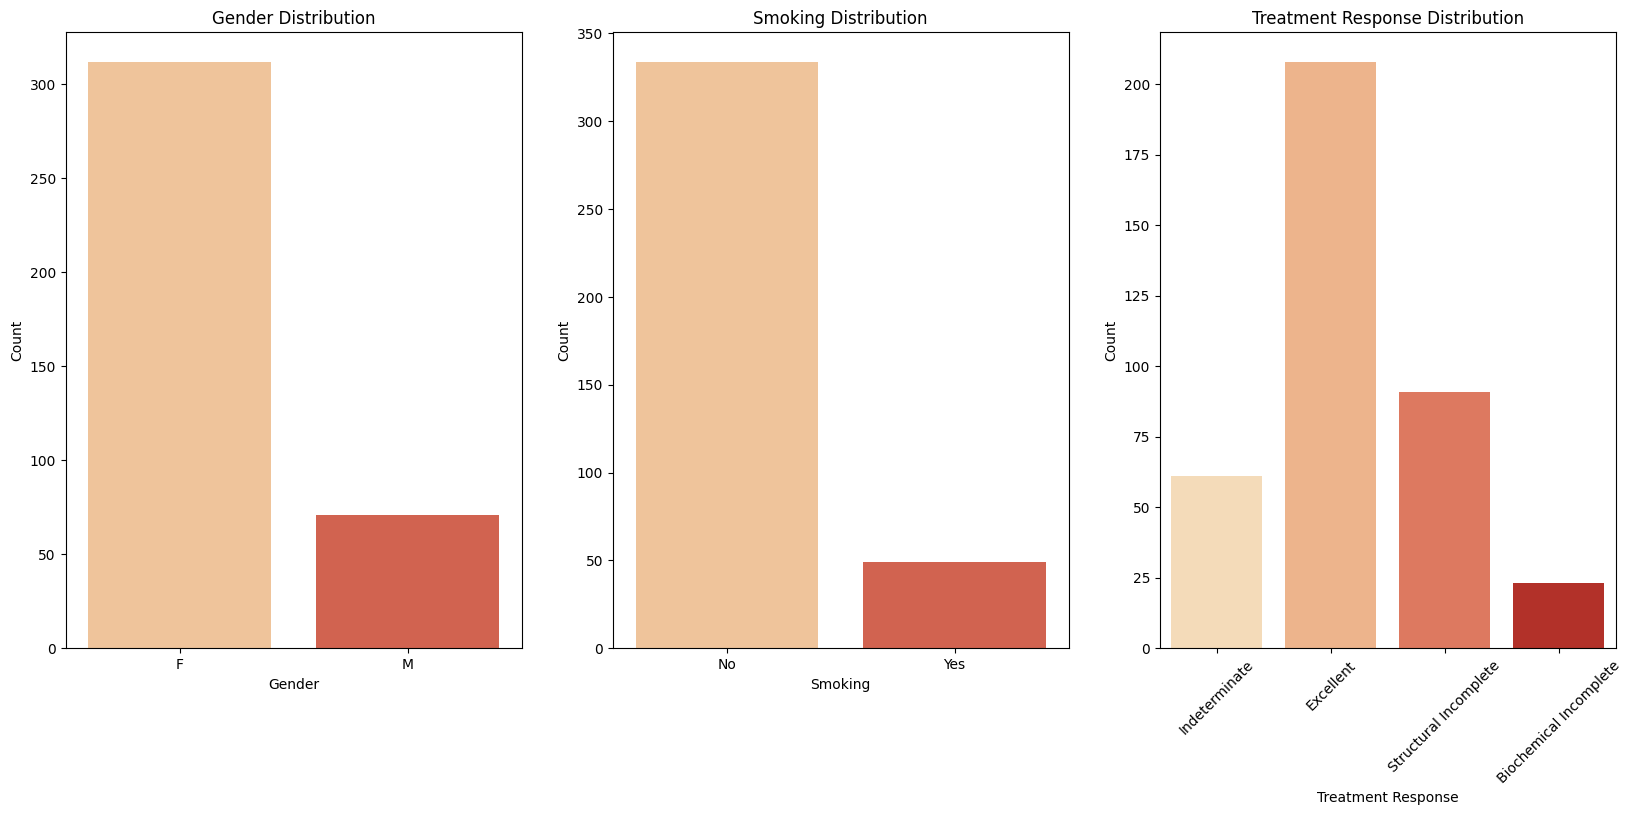

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

#Display the count of patients in each gender category.
sns.countplot(x='Gender', data=data, palette='OrRd', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(x='Smoking', data=data, palette='OrRd', ax=axes[1])
axes[1].set_title('Smoking Distribution')
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Count')

sns.countplot(x='Treatment Response', data=data, palette='OrRd',  ax=axes[2])
axes[2].set_title('Treatment Response Distribution')
axes[2].set_xlabel('Treatment Response')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
plt.show()

**1.From the above plot we conclude that the majority of people who has a thyroid Cancer are Female**

**2.Smoking doesnt affect on the thyroid cancer**

**3.Rate of recovery from the Thyroid cancer are very large**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


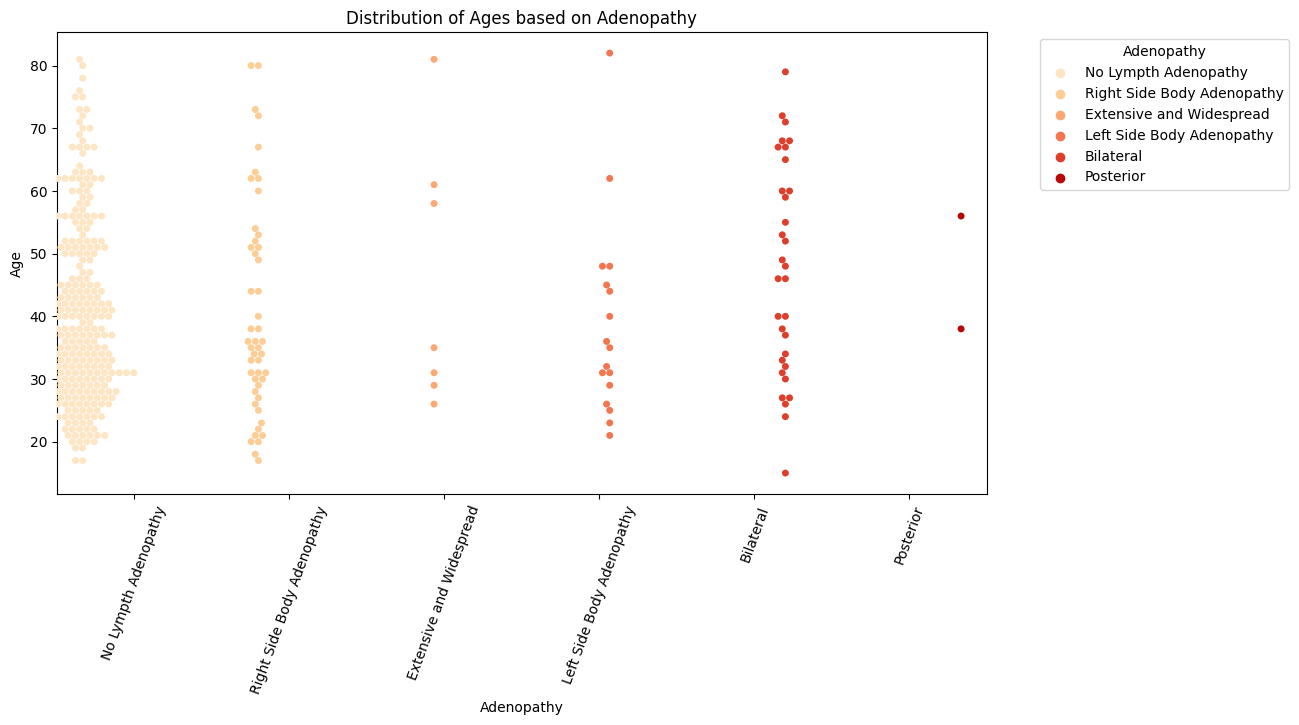

In [13]:
#the distribution of ages based on the presence and location of adenopathy using a swarm plot.
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Adenopathy', y='Age', data=data, palette='OrRd', hue='Adenopathy', dodge=True)
plt.title('Distribution of Ages based on Adenopathy')
plt.xlabel('Adenopathy')
plt.ylabel('Age')
plt.xticks(rotation=70)
plt.legend(title='Adenopathy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**From the above plot we can see that the majority of patients have 'No lymph adenopathy' and the majority of them are from 25 to 40 years old**

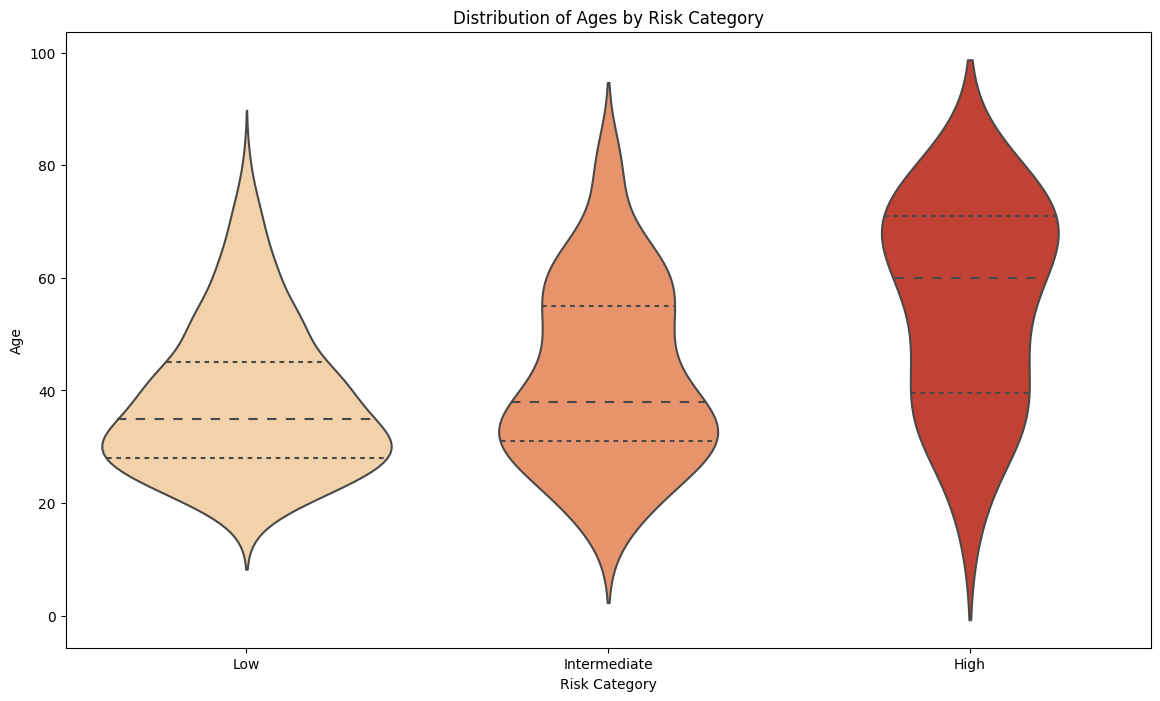

In [14]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Risk', y='Age', data=data, palette='OrRd', inner='quartile')
plt.title('Distribution of Ages by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Age')
plt.show()

# Insights gathered

* Majority of patients have 'No lymph adenopathy' and the majority of them are from 25 to 40 years old.
* Majority of people who has a thyroid Cancer are Female.
* Smoking doesnt affect on the thyroid cancer.
* Rate of recovery from the Thyroid cancer are very large.
* Majority of patients are 40 and 41 years old
* Higher the stage of thyroid cancer, the greater the risk for the patient. 

# Prediction

In [15]:
import tqdm as tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

In [16]:
print("No of Recurred Cases:", len(data[data["Recurred"]=="Yes"]))
print("No of Non-Recurred Cases:",len(data)-len(data[data["Recurred"]=="Yes"]))

No of Recurred Cases: 108
No of Non-Recurred Cases: 275


In [17]:
def data_preprocessing(df):
    scaler = MinMaxScaler()
    df.drop_duplicates(inplace=True)  # Remove duplicates
    df['Recurred']=[0 if result=='No' else 1 for result in df['Recurred']]
    df[['Age']] = scaler.fit_transform(df[['Age']])
    categorical_features = list(df.keys())[1:]
    for feature in categorical_features:
        df[feature] = df[feature].astype('category')
    y, X = df['Recurred'], df.drop('Recurred', axis=1)
    return y, X


In [18]:
y, X = data_preprocessing(data)

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.125, random_state = 42)

In [20]:
xgb_clf = XGBClassifier(n_estimators=350, enable_categorical=True, 
                        colsample_bytree= 0.75, max_depth= 9, early_stopping_round=3, n_jobs=-1, gamma=0.1, verbose=3)

In [21]:
xgb_clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:49:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_round=3,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=350,
              n_jobs=-1, num_parallel_tree=None, ...)

In [22]:
classification_report(y_test,xgb_clf.predict(X_test),output_dict=True)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 33},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 46},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 46}}